In [1]:
%matplotlib inline
from utils import *

In [2]:
H5('train')

['/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/14.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/9.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/10.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/8.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/11.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/15.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/7.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/3.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/2.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/6.h5',
 '/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/1.h5',
 '/Users/akamara/Downloads/new-york-cit

In [28]:
def Updator(fpath,readargs=readargs,scaler=scaler):
    import numpy as np
    def degree_to_radion(degree):
        return degree*(np.pi/180)

    def calculate_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):

        from_lat = degree_to_radion(pickup_latitude)
        from_long = degree_to_radion(pickup_longitude)
        to_lat = degree_to_radion(dropoff_latitude)
        to_long = degree_to_radion(dropoff_longitude)

        radius = 6371.01

        lat_diff = to_lat - from_lat
        long_diff = to_long - from_long

        a = np.sin(lat_diff / 2)**2 + np.cos(degree_to_radion(from_lat)) * np.cos(degree_to_radion(to_lat)) * np.sin(long_diff / 2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

        return radius * c
    df = pandas.read_hdf(fpath,**readargs)
    df['dist_2'] = calculate_distance(
    df.pickup_latitude,
    df.pickup_longitude,
    df.dropoff_latitude,
    df.dropoff_longitude)
    df = df.query('3<fare_amount < 200 and dist > 0')
    return train_test_split(scaler.transform(df.drop(
    ['pickup_datetime','geometry','fare_amount','key'],axis=1)), df.fare_amount, test_size=0.10, random_state=42)

In [4]:
df = pandas.read_hdf('/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/1.h5',**readargs)

In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dayofweek,dayofyear,dist,hour,...,weekofyear,year,nb_roads_max,nb_roads_mean,nb_roads_min,nb_roads_sum,pop_2010_max,pop_2010_mean,pop_2010_min,pop_2010_sum
count,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,...,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06,2.999977e+06
mean,1.134238e+01,-7.250895e+01,3.992034e+01,-7.250740e+01,3.991728e+01,1.684541e+00,3.041260e+00,1.752462e+02,2.500598e-01,1.351153e+01,...,2.545541e+01,2.011739e+03,2.590494e+04,5.576670e+03,5.553497e+02,3.933942e+04,8.197831e+04,4.357586e+04,1.574216e+03,3.914716e+05
std,9.828730e+00,1.320222e+01,8.644442e+00,1.308827e+01,9.984419e+00,1.329081e+00,1.949557e+00,1.047544e+02,1.400829e+01,6.514287e+00,...,1.494074e+01,1.860523e+00,7.157719e+03,2.800170e+03,1.222522e+03,3.288790e+04,2.807286e+04,1.143125e+04,7.848899e+02,4.941552e+05
min,-6.200000e+01,-3.426609e+03,-3.488080e+03,-3.408430e+03,-3.488080e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399139e+01,4.073402e+01,1.000000e+00,1.000000e+00,8.500000e+01,1.239015e-02,9.000000e+00,...,1.300000e+01,2.010000e+03,2.425200e+04,3.833125e+03,3.050000e+02,2.720000e+04,7.015000e+04,3.851033e+04,1.849000e+03,1.727530e+05
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00,3.000000e+00,1.670000e+02,2.143691e-02,1.400000e+01,...,2.400000e+01,2.012000e+03,2.425200e+04,5.444600e+03,3.920000e+02,2.853600e+04,7.295700e+04,4.315850e+04,1.849000e+03,2.569230e+05
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00,5.000000e+00,2.670000e+02,3.833458e-02,1.900000e+01,...,3.900000e+01,2.013000e+03,2.425200e+04,6.758500e+03,6.830000e+02,3.271000e+04,8.077100e+04,4.835980e+04,1.849000e+03,4.175550e+05
max,1.273310e+03,3.439426e+03,2.912465e+03,3.457622e+03,3.345917e+03,2.080000e+02,6.000000e+00,3.660000e+02,7.177413e+03,2.300000e+01,...,5.300000e+01,2.015000e+03,4.630000e+04,4.630000e+04,4.630000e+04,3.623110e+05,1.323780e+05,7.937100e+04,7.937100e+04,8.175133e+06


# OUTLIERS

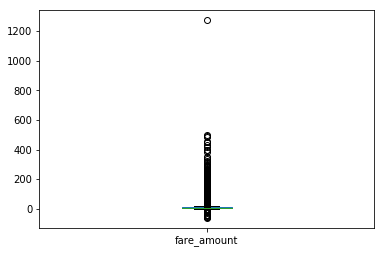

In [6]:
queries = []
df.fare_amount.plot.box()

In [7]:
q = '3<fare_amount < 200'

queries.append(q)

df.query(q).shape#fare_amount.plot.box()

(2974703, 24)

In [8]:
df.shape

(2999977, 24)

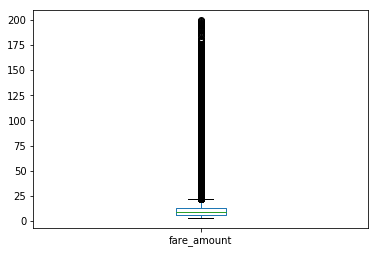

In [9]:
df.query(q).fare_amount.plot.box()

In [10]:
import numpy as np
def degree_to_radion(degree):
    return degree*(np.pi/180)

def calculate_distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    
    from_lat = degree_to_radion(pickup_latitude)
    from_long = degree_to_radion(pickup_longitude)
    to_lat = degree_to_radion(dropoff_latitude)
    to_long = degree_to_radion(dropoff_longitude)
    
    radius = 6371.01
    
    lat_diff = to_lat - from_lat
    long_diff = to_long - from_long

    a = np.sin(lat_diff / 2)**2 + np.cos(degree_to_radion(from_lat)) * np.cos(degree_to_radion(to_lat)) * np.sin(long_diff / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return radius * c

In [11]:
df['dist_2'] = calculate_distance(
    df.pickup_latitude,
    df.pickup_longitude,
    df.dropoff_latitude,
    df.dropoff_longitude)

/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


In [12]:
df.query(' and '.join(queries)).shape#corr().fare_amount.sort_values()

(2974703, 25)

In [13]:
q2 = 'dist > 0'

queries.append(q2)

df.query(' and '.join(queries)).shape

(2892933, 25)

In [14]:
df.query(' and '.join(queries)).corr().fare_amount.sort_values()

pop_2010_min        -0.522388
nb_roads_mean       -0.234221
nb_roads_min        -0.020850
hour                -0.018188
pickup_latitude     -0.005081
dropoff_latitude    -0.004277
dayofweek            0.002782
pickup_longitude     0.005671
dist                 0.007933
dropoff_longitude    0.008201
passenger_count      0.014523
pop_2010_mean        0.022713
weekofyear           0.025478
dayofyear            0.025563
month                0.025626
dist_2               0.033852
year                 0.119593
pop_2010_max         0.255935
nb_roads_max         0.640714
pop_2010_sum         0.731565
nb_roads_sum         0.761858
fare_amount          1.000000
Name: fare_amount, dtype: float64

In [15]:
df = df.query(' and '.join(queries))

In [16]:
' and '.join(queries)

'3<fare_amount < 200 and dist > 0'

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler


In [19]:
scaler = StandardScaler().fit(df.drop(
    ['pickup_datetime','geometry','fare_amount','key'],axis=1))

/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(df.drop(
    ['pickup_datetime','geometry','fare_amount','key'],axis=1)), df.fare_amount, test_size=0.10, random_state=42)

/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [71]:
X_train.shape,X_test.shape

((2603639, 21), (289294, 21))

In [72]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [73]:
X_train.shape,X_eval.shape

((2343275, 21), (260364, 21))

In [79]:
xgbargs = {
    'train_label':y_train.values,
    'train_features_array':X_train,
    'test_label':y_eval.values,
    'test_features_array':X_eval,
    'xgb_params':{
    'objective': 'reg:linear',
    'verbose': True,
    'eta':0.08,
    'xgb_model':None},
    'num_round':100}



In [80]:
class Train_xgboost :
    '''
    This method aims at easing training for Extreme Gradient boosted trees
    '''
    def __init__(self,train_label,train_features_array,test_features_array,test_label,xgb_params,num_round):
        self.xgb_params = xgb_params
        self.num_round = num_round
        self.train_features_array, self.train_label = train_features_array, train_label
        self.test_features_array, self.test_label   = test_features_array, test_label
    def buil_dmatrix(self):
        self.dtrain = xgb.DMatrix(self.train_features_array, label = self.train_label)
        self.dtest = xgb.DMatrix(self.test_features_array, label = self.test_label)
    def launch_training(self,model):
        evallist = [(self.dtest, 'eval'), (self.dtrain, 'train')]
        plst = self.xgb_params.items()
        self.bst = xgb.train(plst,self.dtrain,self.num_round, evallist,xgb_model=model)
    def learn(self,model=None):
        self.buil_dmatrix()
        self.launch_training(model)

## First step

In [ ]:
XGB                                                    = Train_xgboost(**xgbargs)
XGB.learn()


[0]	eval-rmse:13.425	train-rmse:13.4233
[1]	eval-rmse:12.4448	train-rmse:12.4378
[2]	eval-rmse:11.5496	train-rmse:11.5495
[3]	eval-rmse:10.7346	train-rmse:10.7323
[4]	eval-rmse:9.99216	train-rmse:9.98077
[5]	eval-rmse:9.31521	train-rmse:9.30697
[6]	eval-rmse:8.70185	train-rmse:8.68668
[7]	eval-rmse:8.14387	train-rmse:8.12912
[8]	eval-rmse:7.63979	train-rmse:7.62036
[9]	eval-rmse:7.18507	train-rmse:7.16607
[10]	eval-rmse:6.77267	train-rmse:6.75066
[11]	eval-rmse:6.40517	train-rmse:6.37768
[12]	eval-rmse:6.07563	train-rmse:6.04605
[13]	eval-rmse:5.77977	train-rmse:5.74827
[14]	eval-rmse:5.51449	train-rmse:5.48136
[15]	eval-rmse:5.28009	train-rmse:5.24389
[16]	eval-rmse:5.07279	train-rmse:5.03259
[17]	eval-rmse:4.88754	train-rmse:4.84412
[18]	eval-rmse:4.72412	train-rmse:4.67736
[19]	eval-rmse:4.58043	train-rmse:4.53004
[20]	eval-rmse:4.45362	train-rmse:4.40082
[21]	eval-rmse:4.34041	train-rmse:4.28571
[22]	eval-rmse:4.2454	train-rmse:4.18682
[23]	eval-rmse:4.15962	train-rmse:4.09901
[24]

## second step

In [ ]:
X_train, X_test_2, y_train, y_test_2 = Updator(fpath='/Users/akamara/Downloads/new-york-city-taxi-fare-prediction/ml/src/data/train/2.h5',readargs=readargs,scaler=scaler)

In [ ]:
X_train, X_eval_2, y_train, y_eval_2 = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [ ]:
xgbargs['train_label']               = y_train.values
xgbargs['train_features_array']      = X_train


In [64]:
XGB2                                                    = Train_xgboost(**xgbargs)
XGB2.learn(XGB.bst)


[0]	eval-rmse:3.5425	train-rmse:3.46228
[1]	eval-rmse:3.52833	train-rmse:3.44623


KeyboardInterrupt: 

In [ ]:
predicted.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pandas.np.sqrt(mean_squared_error(y_test, predicted))

In [ ]:
batch_size = 50
iterations = 25
model = None
for i in range(iterations):
    for start in range(0, len(x_tr), batch_size):
        model = xgb.train({
            'learning_rate': 0.007,
            'update':'refresh',
            'process_type': 'update',
            'refresh_leaf': True,
            #'reg_lambda': 3,  # L2
            'reg_alpha': 3,  # L1
            'silent': False,
        }, dtrain=xgb.DMatrix(x_tr[start:start+batch_size], y_tr[start:start+batch_size]), xgb_model=model)

        y_pr = model.predict(xgb.DMatrix(x_te))
        #print('    MSE itr@{}: {}'.format(int(start/batch_size), sklearn.metrics.mean_squared_error(y_te, y_pr)))
    print('MSE itr@{}: {}'.format(i, sklearn.metrics.mean_squared_error(y_te, y_pr)))

y_pr = model.predict(xgb.DMatrix(x_te))
print('MSE at the end: {}'.format(sklearn.metrics.mean_squared_error(y_te, y_pr))